# Conservation metrics data

This notebook sorts through the old 2sec files I made of each annotation. To produce these did some annotation cleaning as these did not follow a common format and there were issues like non-matching sentence cases.

This notebook:
- plots the num of annotated clips per dataset
- plots distribution of all annotations
- 

In [3]:
import os
import pandas as pd

# Folder path (new hard drive)
folder_path = r"E:\building_datasets\larger_datasets\consvmets_clips"

# Create a list to hold the file data
data = []

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        # Split the filename into parts
        parts = filename[:-4].split(".")
        index = int(parts[0])  # Convert the 6-digit number to an integer
        location = parts[1]
        file_class = parts[2]

        # Append the extracted data to the list
        data.append((index, location, file_class))

# Create a DataFrame
df = pd.DataFrame(data, columns=['Index', 'Location', 'Class'])

# Display the DataFrame
df.head()




,Index,Location,Class
0,1,hawaii_himb,bioph_knock_croak_a
1,2,hawaii_himb,bioph_knock_croak_a
2,3,palmyra_other,bioph_damselfish
3,4,hawaii_himb,bioph_knock_croak_a
4,5,hawaii_himb,bioph_knock_croak_a


### Num files per dataset

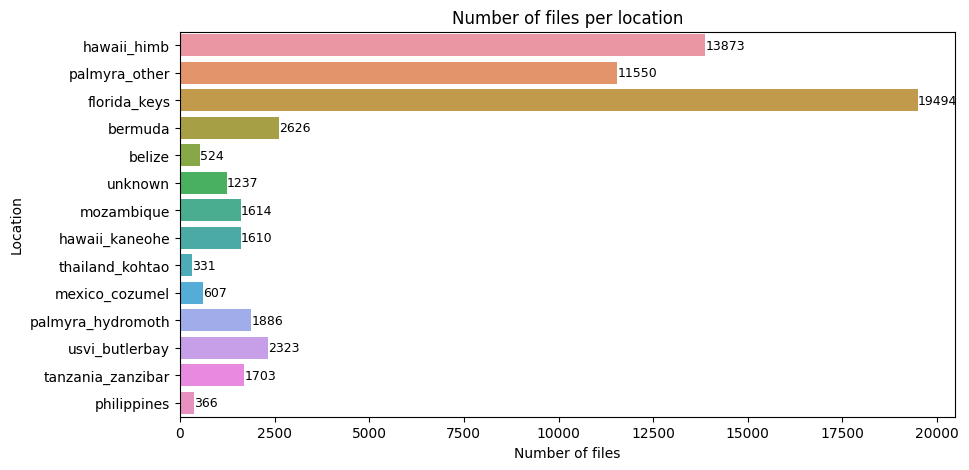

In [4]:
# in clips_dir, find all unqiue locations
import os
import matplotlib.pyplot as plt
import seaborn as sns

locations = [x.split('.')[1] for x in os.listdir(folder_path)]
locations = list(set(locations))

# barplot the number of filenames that match each location with the number above the bar

plt.figure(figsize=(10, 5))

# generate the countplot
sns_countplot = sns.countplot(y=[x.split('.')[1] for x in os.listdir(folder_path)])

plt.title('Number of files per location')
plt.xlabel('Number of files')
plt.ylabel('Location')

# add the count right next to each bar
for patch in sns_countplot.patches:
    count = patch.get_width()
    x_pos = count + 0.2  # add a small space to the right of each bar
    y_pos = patch.get_y() + patch.get_height() / 2  # center the label vertically
    plt.text(x_pos, y_pos, str(int(count)), va="center", fontsize=9)

plt.show()

### Distribution of all annotations

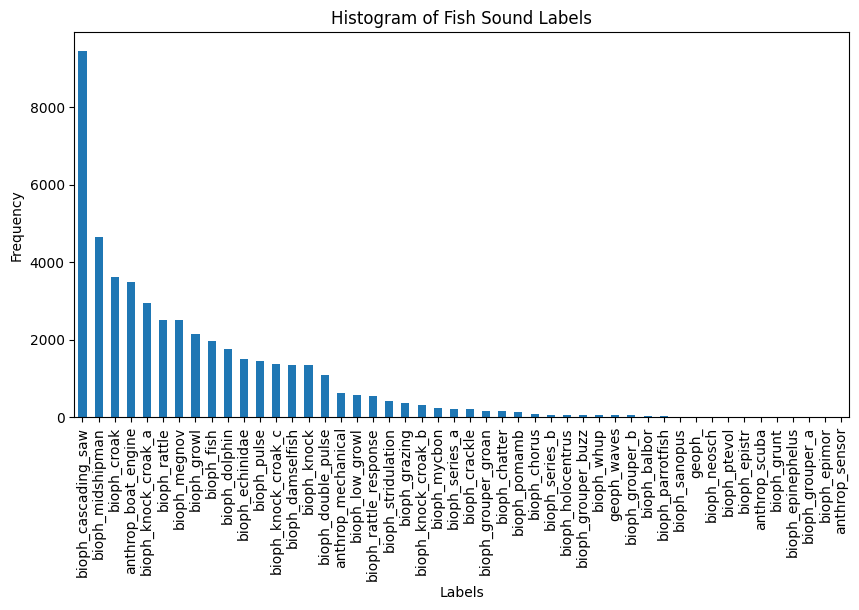

In [7]:
# Plot a histogram of the label counts
df['Class'].value_counts().plot(kind='bar')

# Set the title and labels
plt.title('Histogram of Sound Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# make histogram wider
plt.gcf().set_size_inches(10, 5)

# Show the plot
plt.show()


### Questions
What are:
- 0, is this ambient background sound? Ben, check if this is across all sites or just some
- toID
- MYCBON
- EPIGUT

See what these are:
- Beeping - i think this is the soudntrap start sound, may want to find all and remove
- Fish_seriesof9_2500Hz
- Fish_seriesof6_500Hz
- fish (changed from 'Fish')
- IMPOSSIBLE
- speech (formaly 'HOMSAP_speech')
- geophony (is it diff from wave action?)
- HOMSAP_beeping
- epigut
- megnov
- epimor
- megnov_werp
- pomamb
- neosch
- epistr
- epinephelus
- fish_series 
- unidentified (formerly Impossible)

I changed labels to this:
bioph_knock_croak_a 'Fish_knock_and_croak_A'
bioph_damselfish 'possDamselfish'
bioph_knock 'Fish_knock_2500Hz'
unidentified1 'toID'
fbioph_stridulation 'Fish_stridulation'
bioph_series_a'Fish_seriesof9_2500Hz'
invert_echinidae'possEchinidae'
invert_holocentrus'possHolocentrus'
bioph_growl'Low_growl'
bioph_mycbon'MYCBON'
bioph_epimor'possEPIMOR'
bioph_croak'Fish_croak_250to1200Hz'
bioph_balbor'possBALBOR'
anthrop_boat_engine'Engine_boat'
unidentified2'0'
bioph_knock_croack_b'Fish_knock_and_croak_B'
bioph_series_b'Fish_seriesof6_500Hz'
bioph_cascading_saw'Cascading_saw'
bioph_grazing'Fish_grazing'
bioph_grouper_groan'possGrouper_Groan'
bioph_megnov'MEGNOV'
bioph_rattle_response'Fish_rattle_call_response'
bioph_whup'Fish_whup_1500Hz'
bioph_chorus'Fish_belize_chorus'
anthrop_speech'HOMSAP_speech'
bioph_cascading_saw'Cascading_saw_Palmyra_HM'
geoph_waves'Wave_action'
anthrop_mechanical'possMechanical'
bioph_fish'Fish'
bioph_dolphin'possDolphin'
bioph_midshipman'possMidshipman'
anthrop_beeping'HOMSAP_beeping'
bioph_epigut'EPIGUT'
unidentified3'Impossible'
bioph_rattle'Fish_rattle_300to1500Hz'
bioph_low_growl'Fish_upslurred_low_growl'
bioph_pulse'Fish_pulse_Florida'
bioph_grouper_a'possGrouper_1stPartial'
bioph_pulse'Fish_pulse_Mozambique'
bioph_pulse'Fish_pulse_100to700Hz'
geoph_'Geophony'
bioph_knock_croak_b'notFish_knock_and_croak'
bioph_chatter'Reef_chatter'
bioph_double_pulse'Fish_double_pulse_1000Hz'
bioph_grouper_b'possGrouper'
bioph_crackle'Crackle'
bioph_grunt'Grunt'
bioph_grouper_buzz'possGrouper_Buzz'
bioph_sanopus'possSanopus'
bioph_mycbon'possMYCBON'
bioph_megnov'possMEGNOV'
bioph_fish'Fish_single_zip'
bioph_epimor'EPIMOR_1'
bioph_epigut'possEPIGUT'
bioph_ptevol'possPTEVOL'
anthrop_scuba'HOMSAP_scuba'
bioph_epistr'possEPISTR'
bioph_megnov'possMEGNOV_werp'
bioph_pomamb'possPOMAMB'
bioph_neosch'possNEOSCH'
bioph_parrotfish'possParrotfish'
bioph_chatter'Fish_palmyra_reefchatter_200to700Hz'
bioph_fish'Fish_palmrya_100to800Hz'
bioph_epinephelus'possEpinephelus'
anthrop_sensor'Sensor_noise'


### Number of unique labels per dataset

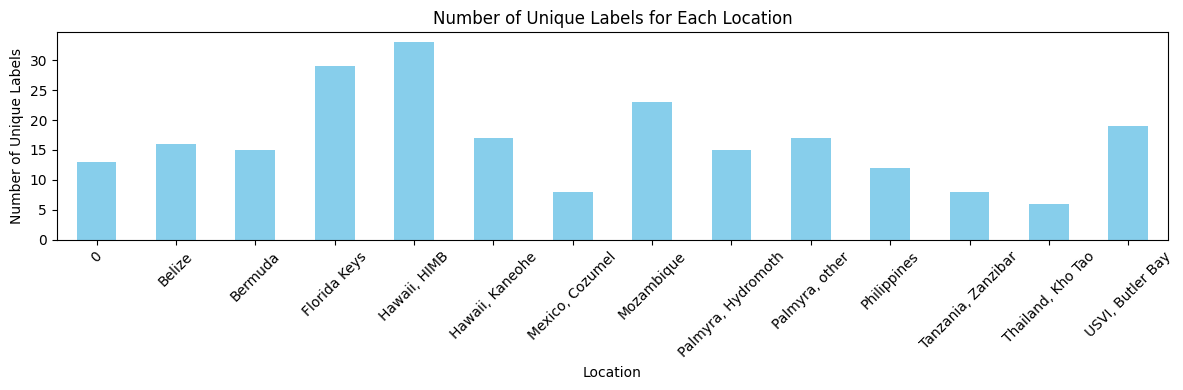

In [14]:
# load the csv file
path = r'C:\Users\ben07\OneDrive - University College London\Google\work\data_wrangling\csvs\conservation_metrics_data_v3.csv'
df_updated = pd.read_csv(path)

# Group the updated data by location and count the number of unique labels for each location
location_label_counts_updated = df_updated.groupby('location')['label'].nunique()

# Create a bar plot of the number of unique labels for each location in the updated data
plt.figure(figsize=(12, 4))
location_label_counts_updated.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Unique Labels')
plt.title('Number of Unique Labels for Each Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of labels per dataset

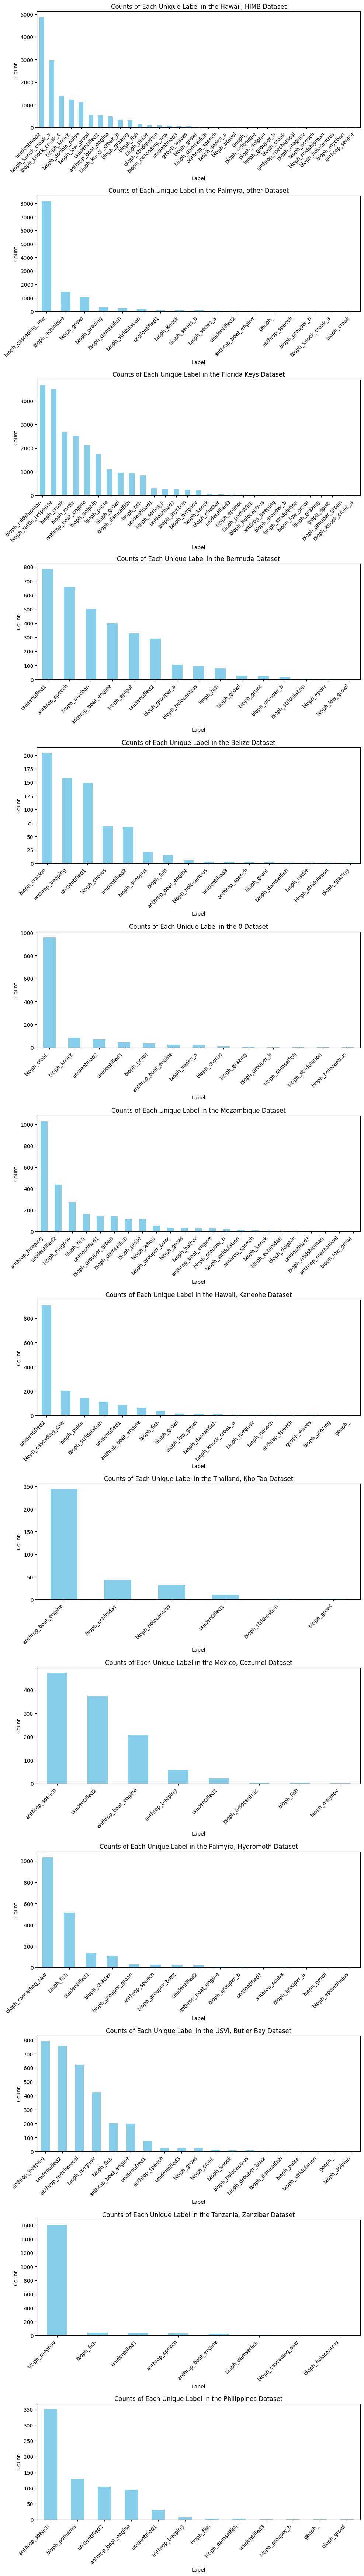

In [15]:
# List of unique locations
locations = df_updated['location'].unique()

# Create a subplot for each location
fig, axs = plt.subplots(len(locations), 1, figsize=(10, 5*len(locations)))

# For each location, plot a histogram of the counts of each unique label
for i, location in enumerate(locations):
    location_df = df_updated[df_updated['location'] == location]
    location_label_counts = location_df['label'].value_counts()
    
    location_label_counts.plot(kind='bar', color='skyblue', ax=axs[i])
    axs[i].set_xlabel('Label')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Counts of Each Unique Label in the {location} Dataset')
    
    # Change the rotation of x-axis labels to 45 degrees
    # Align the end of the label with the center of the bar
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


## Map

In [ ]:
# Define a dictionary with the locations and their respective coordinates
location_coords = {
    'Florida Keys': (24.559688, -81.784404), 
    'Hawaii': (21.3, -157.8), 
    'Palmyra Atoll': (5.9, -162.1), 
    'Kaneohe, Hawaii': (21.4, -157.8), 
    'Bermuda': (32.307800, -64.750500), 
    'Belize': (17.189877, -88.497650), 
    'Cozumel, Mexico': (20.422984, -86.922343),
    'Philippines': (13.0, 122.0),
    "Lizard Island, Australia": (-14.6645, 145.4651),
    "Mo'orea, French Polynesia": (-17.5388, -149.8295),
    "Fulhadhoo, Philippines": (4.8849, 72.9350),
    "Spermdone, Indonesia": (-4.8756, 119.1144),
    "Panama": (8.796097, -79.543456),
    'Mozambique': (-18.665695, 35.529562),
    'US Virgin Islands, Butler Bay': (17.7296, -64.89),
    'Tanzania, Zanzibar, ': (-6.1659, 39.2026),
    'Thailand, Kho Tao': (10.0956, 99.8404),
    'Kenya, Manda Bay': (-2.1610, 41.0277)
    # Mary's labelled Philippines data
    # Kenya?? Unlablled though
}

# Create a map centered around the first location
m = folium.Map(location=location_coords['Florida Keys'], zoom_start=2)

# Add markers for each location to the map
for location, coord in location_coords.items():
    folium.Marker(location=coord, popup=location).add_to(m)

# Display the map
m

# duplicates
# philippines
# GBR
# Hawaii
# Florida Keys
# Palmyra Atoll
# French Polynesia

